# Denoising Variational Autoencoder

0. Code is more or less an exact reproduction of the excellent tutorial at : https://blog.keras.io/building-autoencoders-in-keras.html 
1. Used for Digit Data Denoising
2. Run on Google's Colaboratory (free GPU power!)
3. Modified the output plots to include:
    a. Original digit
    b. Digit with noise
    c. Reconstructed digits with noise removed

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Keras imports here include the Upsampling layer which is used for reconstruction of the image data

from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Input
from keras.models import Model

Using TensorFlow backend.


## Loading the MNIST images into the variables and adding noise to them

1. Noise factor controls the amount of noise that will be added to the images
2. Train and test images are both modified with the noise
3. Noisy images are plotted for reference


In [0]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

## Plotting the noisy digits

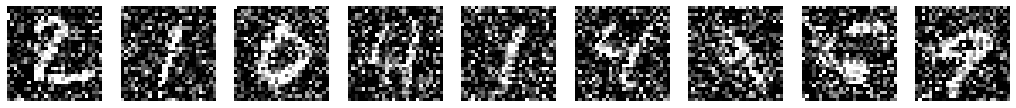

In [3]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


## Encoder Network Definition 

In the below section, details of the network are defined:

1. Convolution and Pooling layers for the encoder network
2. Input shape is set to the size of the images, i.e., (28,28)
3. The encoding process converts the image to a (7,7,32) tensor


In [0]:
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

## Decoder Network Definition

The network defined from this point onwards is a decoder network.

1. This has alternating convolution and upsampling steps
2. The final result of the decoder network is an image of (28,28) dimensions
3. Finally, the autoencoder network, which consists of the input, all the way to the decoder network (the entire graph) is defined

In [0]:
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)


## Compilation, Fitting and Generation of De-noised Digits

1. Note that the training step where we fit the model expects examples of non-noisy images as the ground truth. 
2. Depending on the quality of input data and targets, we can get different levels of performance from the denoising autoencoder

In [6]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train_noisy, x_train, epochs=32, batch_size=256, shuffle=True, validation_data=(x_test_noisy, x_test) )

decoded_imgs = autoencoder.predict(x_test)

Train on 60000 samples, validate on 10000 samples
Epoch 1/32
60000/60000 [==============================] - 8s 128us/step - loss: 0.2194 - val_loss: 0.1403
Epoch 2/32
60000/60000 [==============================] - 6s 100us/step - loss: 0.1295 - val_loss: 0.1182
Epoch 3/32
60000/60000 [==============================] - 6s 100us/step - loss: 0.1186 - val_loss: 0.1153
Epoch 4/32
60000/60000 [==============================] - 6s 100us/step - loss: 0.1137 - val_loss: 0.1105
Epoch 5/32
60000/60000 [==============================] - 6s 100us/step - loss: 0.1107 - val_loss: 0.1105
Epoch 6/32
60000/60000 [==============================] - 6s 100us/step - loss: 0.1087 - val_loss: 0.1072
Epoch 7/32
60000/60000 [==============================] - 6s 100us/step - loss: 0.1073 - val_loss: 0.1044
Epoch 8/32
60000/60000 [==============================] - 6s 100us/step - loss: 0.1060 - val_loss: 0.1056
Epoch 9/32
60000/60000 [==============================] - 6s 99us/step - loss: 0.1050 - val_loss: 0.10

## Plotting the original, noisy and reconstructed images

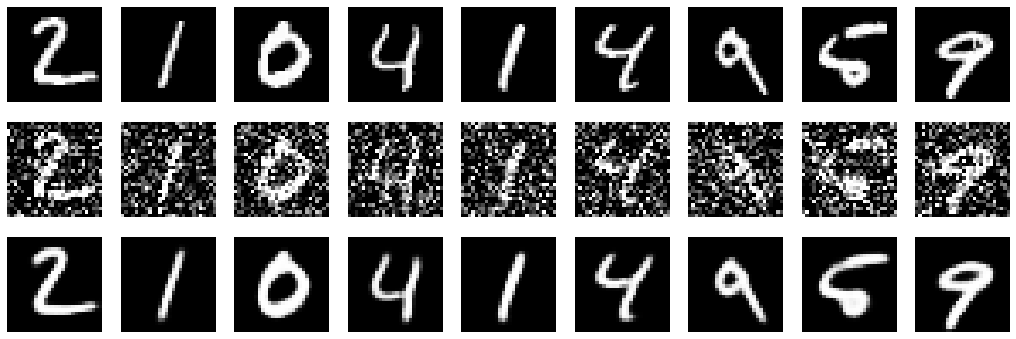

In [7]:

n = 10
plt.figure(figsize=(20, 6))
for i in range(1,n):
    # display original
    ax = plt.subplot(3, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display noisy version
    ax = plt.subplot(3, n, i + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
        
    # display reconstruction
    ax = plt.subplot(3, n, i + 2 * n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()